Pobranie bazy filmów oraz bazy gatunków.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
movies = pd.read_csv('tmdb_movies.csv')
movies.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
genres = pd.read_csv('tmdb_genres.csv')
genres

,Unnamed: 0,genre_id,genres
0,0,28.0,Action
1,1,12.0,Adventure
2,2,14.0,Fantasy
3,3,16.0,Animation
4,4,878.0,Science Fiction
5,5,18.0,Drama
6,6,53.0,Thriller
7,7,10751.0,Family
8,8,35.0,Comedy
9,9,36.0,History


1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

a) wyliczenie 3 kwartyla dla rozkładu liczby głosów

In [4]:
movies['vote_count'].quantile(0.75)

737.0

b) lista 10 najwyżej ocenianych filmów, których liczba głosów jest większa od 3. kwartyla rozkładu liczby głosów

In [5]:
movies2 = movies[movies['vote_count'] > 737.0].sort_values(by='vote_average',ascending=False)
movies2[['original_title','vote_average','vote_count']].sort_values(by='vote_average',ascending=False)[:10]

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
2294,千と千尋の神隠し,8.3,3840
3865,Whiplash,8.3,4254
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
662,Fight Club,8.3,9413
3719,One Flew Over the Cuckoo's Nest,8.2,2919
809,Forrest Gump,8.2,7927


2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [6]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies3 = movies.groupby(pd.Grouper(key='release_date',freq='Y')).agg({'revenue':'mean','budget':'mean'})
movies4 = movies3.loc[['2010-12-31','2011-12-31','2012-12-31','2013-12-31','2014-12-31','2015-12-31','2016-12-31']]
movies4

,revenue,budget
release_date,,
2010-12-31,9.043811e+07,3.449541e+07
2011-12-31,9.200413e+07,3.477232e+07
2012-12-31,1.160659e+08,3.492203e+07
2013-12-31,1.013485e+08,3.552329e+07
2014-12-31,1.013466e+08,3.095989e+07
2015-12-31,1.054399e+08,3.113216e+07
2016-12-31,1.390496e+08,4.570327e+07


Text(0.5, 1.0, 'Średni przychód i budżet filmu w latach 2010-2016')

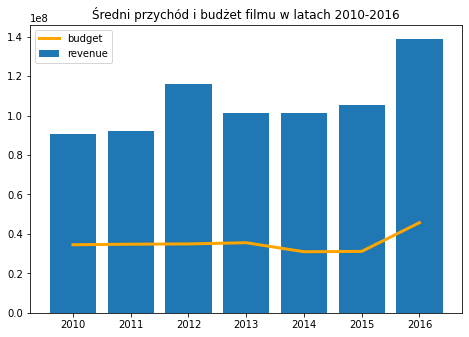

In [7]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
x = np.array(['2010','2011','2012','2013','2014','2015','2016'])
y = movies4['revenue']
axes.bar(x,y,label='revenue')
axes.plot(x,movies4['budget'],label='budget',color='orange',linewidth=3)
axes.legend(loc=0)

plt.title('Średni przychód i budżet filmu w latach 2010-2016')

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [9]:
table = pd.merge(movies,genres,how='inner',on='genre_id')
table[['original_title','genre_id','genres']].sample(10)

,original_title,genre_id,genres
3301,Topsy-Turvy,35.0,Comedy
2994,Ted,35.0,Comedy
1661,The Young Victoria,18.0,Drama
1704,Love & Other Drugs,18.0,Drama
1576,The Client,18.0,Drama
4449,Urban Legends: Final Cut,27.0,Horror
2483,You Can Count on Me,18.0,Drama
3288,Envy,35.0,Comedy
1636,Magnolia,18.0,Drama
3167,Pitch Perfect 2,35.0,Comedy


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [10]:
table['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

Odp. Najczęściej pojawia się gatunek Drama - 1207 wystąpień w bazie.

5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [11]:
table2 = table.groupby(pd.Grouper(key='genres')).agg({'runtime':'mean'})
table2.sort_values(by='runtime',ascending=False)[:10]

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


Odp. Średnio najdłużej trwają firmy z gatunku History (prawie 134 min.) i War (ponad 126 min.).

6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

a) histogram, wariant I

Text(0.5, 1.0, 'Czas trwania filmów History')

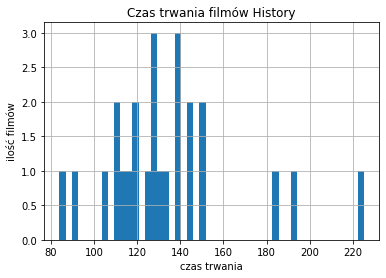

In [13]:
table3 = table[table['genres'] == 'History']
table3['runtime'].hist(bins=50)
plt.xlabel('czas trwania')
plt.ylabel('ilość filmów')
plt.title('Czas trwania filmów History')

b) histogram, wariant II

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

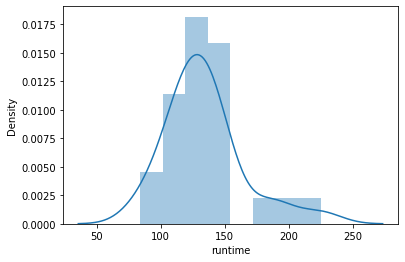

In [14]:
sns.distplot(table3['runtime'])